<a href="https://colab.research.google.com/github/Daivar/ML-models-training/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SVD

In [1]:
import numpy as np

# X = np.array([[1,2,3], [1,2,3]])
X = np.array([[1,5,3,9,5]])

X_centered = X - X.mean(axis=0) 
U, s, Vt = np.linalg.svd(X_centered) 
print(Vt.shape)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

(5, 5)


### PCA

In [2]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[-1, -1], [-2.5, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
comps = pca.fit_transform(X)



In [3]:
pca.__dict__

{'_fit_svd_solver': 'full', 'components_': array([[ 0.84898362,  0.52841916],
        [-0.52841916,  0.84898362]]), 'copy': True, 'explained_variance_': array([8.34459788, 0.09706879]), 'explained_variance_ratio_': array([0.98850123, 0.01149877]), 'iterated_power': 'auto', 'mean_': array([-0.08333333,  0.        ]), 'n_components': 2, 'n_components_': 2, 'n_features_': 2, 'n_features_in_': 2, 'n_samples_': 6, 'noise_variance_': 0.0, 'random_state': None, 'singular_values_': array([6.45933351, 0.6966663 ]), 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}

In [4]:
pca.components_

array([[ 0.84898362,  0.52841916],
       [-0.52841916,  0.84898362]])

In [5]:
comps

array([[-1.30665415, -0.3645994 ],
       [-2.58012958,  0.42802934],
       [-3.53304055, -0.1567447 ],
       [ 1.44815142,  0.27652954],
       [ 2.29713504, -0.25188962],
       [ 3.67453782,  0.06867484]])

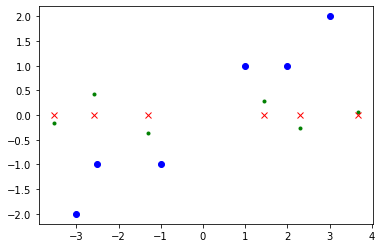

In [6]:
import matplotlib.pyplot as plt

plt.plot(X[:, 0], X[:,1], 'bo')
plt.plot(comps[:, 0], comps[:, 1], 'g.')
plt.plot(comps[:, 0], [0] * 6, 'rx')

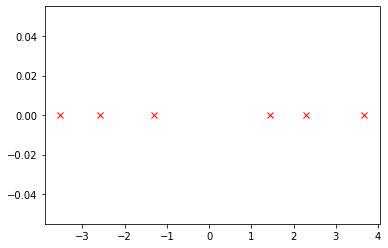

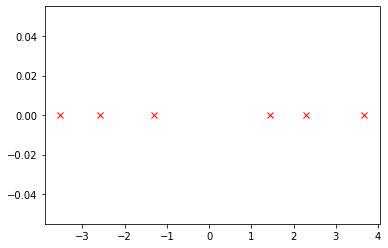

In [7]:
plt.plot(comps[:, 0], [0] * 6, 'rx') # if we were to choose only PC1
plt.show()

# compare with single component PCA
pca = PCA(n_components=1)
comps2 = pca.fit_transform(X)
plt.plot(comps2, [0] * len(comps), 'rx') # if we were to choose only PC1

### Explained variance

In [8]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.98850123]
[6.45933351]


### Choosing dimensionality

In [9]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
mnist["data"]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
X_train.shape

(52500, 784)

In [13]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   5.,  47.,  24.,  1

In [14]:
y_train[0]

5

In [15]:
y[0]

5

In [16]:
for i in range(0, 28):
   for j in range(0, 28):
      print(str(X_train[0][j*i]), end='')
print()

0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.013.00.024.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.05.00.020.00.070.0100.0245.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0253.077.0253.00.0253.0253.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.024.00.0124.0245.00.0253.0253.00.0152.084.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.013.00.00.0124.0253.00.0253.0167.00.0161.00.0162.00.00.00.00.00.00.00.00.00.00.00.00.00

In [17]:
for i in range(1, 28):
  for j in range(0, 28):
    print('{:5}'.format(str(X_train[0][j*i])), end='')
  print()

0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  13.0 0.0  24.0 
0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  20.0 0.0  70.0 100.0245.0
0.0  0.0  0.0

In [22]:
img = X_train[0].reshape(28, 28)

for line in img:
  for pixel in line:
    print(str(pixel).rjust(5, ' '), end='')
  print()

  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0 47.0 24.0 13.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 20.0 24.0 56.0101.0 77.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0 70.0253.0253.0229.0158.0124.0124.0100.0 77.0 77.0124.0124.0174.0200.0245.0253.0253.0253.0215.0  0.0  0.0
  0.0  0.0  0

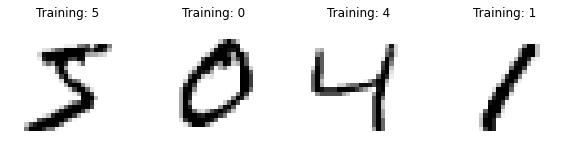

In [18]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, mnist["data"], mnist["target"]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

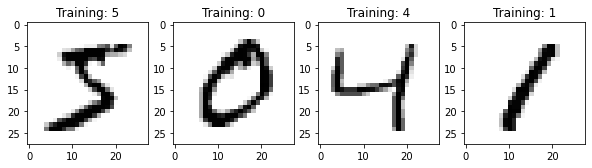

In [24]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, mnist["data"], mnist["target"]):
    # ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [25]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
d = np.argmax(cumsum >= 0.95) + 1

[0.09713429 0.16843941 0.22987391 0.28403099 0.33283956 0.37589549
 0.40869886 0.43769681 0.46536483 0.48875833 0.50978015 0.53010663
 0.54726065 0.56424187 0.58010343 0.59506275 0.60830683 0.6210894
 0.63298169 0.6445304  0.65517093 0.66525147 0.67483384 0.68392532
 0.692777   0.7011899  0.70929832 0.7171817  0.72462469 0.73150318
 0.7380302  0.74450272 0.75053518 0.75640819 0.762085   0.76749909
 0.77258788 0.77740264 0.78220604 0.78689399 0.7914405  0.79590281
 0.80008458 0.80404961 0.80788745 0.81164444 0.81526966 0.81877332
 0.82216918 0.82538    0.82857154 0.83168458 0.83464986 0.83750293
 0.84032364 0.84301759 0.84570607 0.84825793 0.8507951  0.85324694
 0.8556504  0.85803272 0.86032422 0.86253625 0.86467976 0.86674476
 0.86877329 0.87072382 0.8726469  0.87453715 0.87640033 0.87821278
 0.87998076 0.88171245 0.88336034 0.8849879  0.88660728 0.88814983
 0.88962285 0.89105131 0.89246619 0.89386559 0.89525659 0.89660878
 0.89793634 0.89925621 0.900548   0.90180145 0.90302405 0.90422

In [26]:
len(pca.explained_variance_ratio_)
print(X_train.shape)

(52500, 784)


In [27]:
d

154

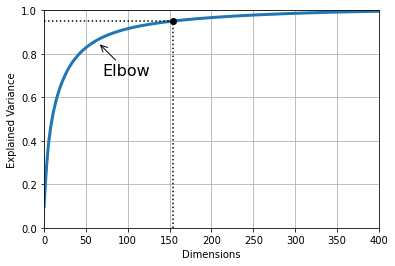

In [28]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7), arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [29]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))

154
0.9503682084470717


In [30]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [32]:
import matplotlib as mpl


def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28Ã—28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

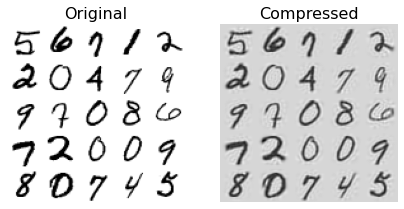

In [33]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#import the breast _cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.keys())
print(data['target_names'])
print(data['feature_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [35]:
df1 = pd.DataFrame(data['data'], columns=data['feature_names'])
print(f'Shape before PCA: {df1.shape}')

scaling=StandardScaler()
scaling.fit(df1)
Scaled_data=scaling.transform(df1)
 
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)
 
print(f'Shape after PCA: {x.shape}')

Shape before PCA: (569, 30)
Shape after PCA: (569, 3)


Text(0, 0.5, 'pc2')

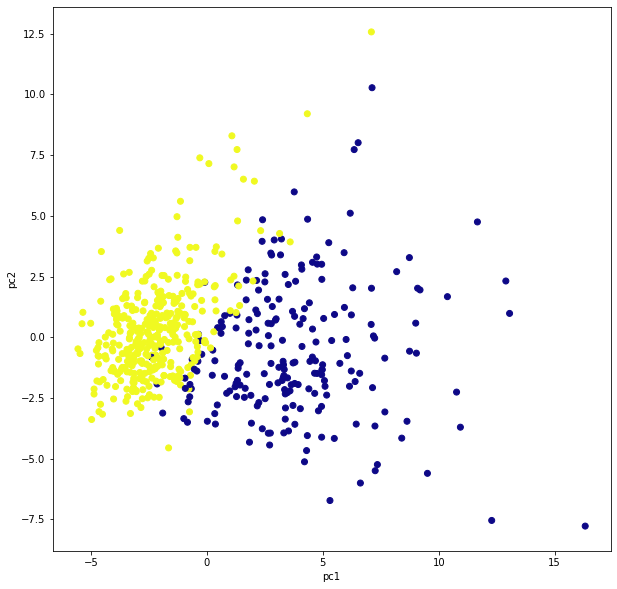

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=data['target'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

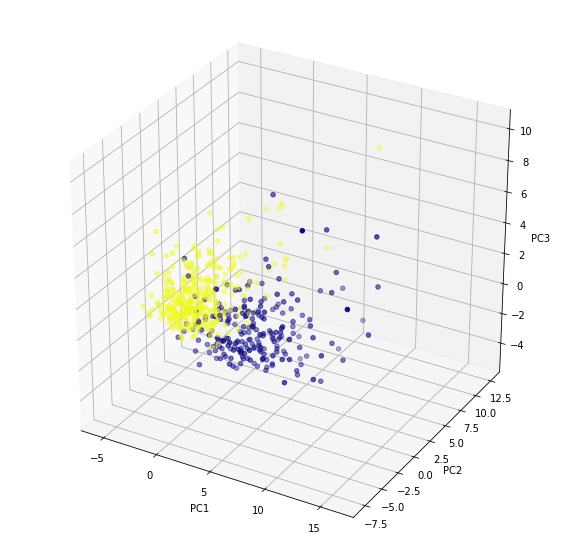

In [37]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=data['target'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [38]:
x

array([[ 9.19283683,  1.94858308, -1.12316602],
       [ 2.3878018 , -3.76817173, -0.52929261],
       [ 5.73389628, -1.0751738 , -0.55174763],
       ...,
       [ 1.25617928, -1.90229672,  0.56273047],
       [10.37479406,  1.6720101 , -1.87702938],
       [-5.4752433 , -0.67063677,  1.49044324]])

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
# print(data.keys())
# print(data['target_names'])
# print(data['feature_names'])

# create X and Y and split
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=2)
# NOTE: fit_transform on train data, then tranform on test data!
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# model
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train.values.ravel())
y_pred = logreg.predict(X_test_pca)

# eval
print(confusion_matrix(y_test, y_pred))

[[39  4]
 [ 0 71]]


time with psa: 0.027405500411987305
[[40  3]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

time without psa: 2.4413247108459473
[[39  4]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



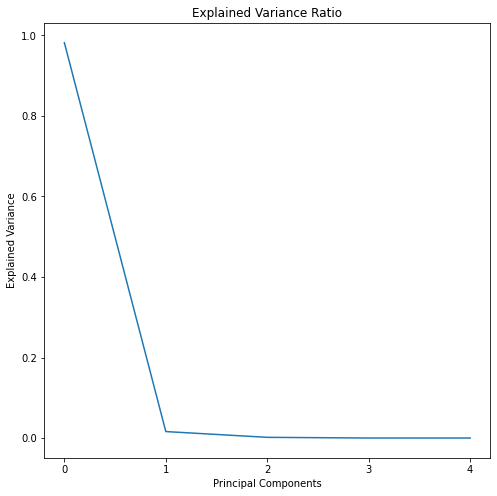

0.9999882293472612
time with psa: 0.018742799758911133
logistic reg               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

time with psa: 0.012089014053344727
svc               precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

time with psa: 0.003100156784057617
dclf               precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.96      0.90      0.93        71

    accuracy                     

In [43]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import time
data = load_breast_cancer()
# create X and Y and split
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pca = PCA(n_components=3)
# NOTE: fit_transform on train data, then tranform on test data!
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# model
curr_time = time.time()
logreg = LogisticRegression(C=5, max_iter=10000)
logreg.fit(X_train_pca, y_train.values.ravel())
y_pred = logreg.predict(X_test_pca)
# eval
print("time with psa:", time.time() - curr_time)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
curr_time = time.time()
logreg = LogisticRegression(C=5, max_iter=10000)
logreg.fit(X_train, y_train.values.ravel())
y_pred = logreg.predict(X_test)
print("time without psa:", time.time() - curr_time)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

    
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
data = load_breast_cancer()
# create X and Y and split
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
component_count = 5
pca = PCA(n_components=component_count)
pca.fit(X_train)
plt.figure(figsize=(8,8))
plt.plot(range(0,component_count), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.xticks(range(0,component_count))
plt.title('Explained Variance Ratio')
plt.show()
print(np.sum(pca.explained_variance_ratio_))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time

data = load_breast_cancer()
# create X and Y and split
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pca = PCA(n_components=3)
# NOTE: fit_transform on train data, then tranform on test data!
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# logistic regression
curr_time = time.time()
logreg = LogisticRegression(C=5, max_iter=1000, random_state=0)
logreg.fit(X_train_pca, y_train.values.ravel())
y_pred = logreg.predict(X_test_pca)
print("time with psa:", time.time() - curr_time)
print("logistic reg", classification_report(y_test, y_pred))
# svc
curr_time = time.time()
svc = SVC(C=5, max_iter=1000, random_state=0)
svc.fit(X_train_pca, y_train.values.ravel())
y_pred = svc.predict(X_test_pca)
print("time with psa:", time.time() - curr_time)
print("svc", classification_report(y_test, y_pred))
# no standardscaler used, but precision is ok
# decision tree
curr_time = time.time()
dclf = DecisionTreeClassifier(random_state=0)
dclf.fit(X_train_pca, y_train.values.ravel())
y_pred = dclf.predict(X_test_pca)
print("time with psa:", time.time() - curr_time)
print("dclf", classification_report(y_test, y_pred))


In [2]:
import pandas as pd
import numpy as np
import time
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
runs = 5
data = load_breast_cancer()
# create X and Y and split
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scores = ([], [])
for i in range(runs):
  current = time.time()
  pca = PCA(n_components=3)
# NOTE: fit_transform on train data, then transform on test data!
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
# model
  logreg = LogisticRegression(C=5, max_iter=10000)
  logreg.fit(X_train_pca, y_train.values.ravel())
  y_pred = logreg.predict(X_test_pca)
  scores[0].append(time.time() - current)
  scores[1].append(accuracy_score(y_pred, y_test))
#print
print('w PCA time:', sum(scores[0])/len(scores[0]))
print('w PCA accuracy: ', sum(scores[1])/len(scores[1]))

w PCA time: 0.03061361312866211
w PCA accuracy:  0.9736842105263157


In [3]:
log_scores = ([], [])
for i in range(runs):
  current = time.time()
  
  logreg = LogisticRegression(C=5, max_iter=10000)
  logreg.fit(X_train, y_train.values.ravel())
  y_pred = logreg.predict(X_test)

  log_scores[0].append(time.time() - current)
  log_scores[1].append(accuracy_score(y_pred, y_test))

# print
print('w/o PCA time:', sum(log_scores[0])/len(log_scores[0]))
print('w/o PCA accuracy: ', sum(log_scores[1])/len(log_scores[1]))

w/o PCA time: 1.5489071369171143
w/o PCA accuracy:  0.956140350877193
